In [1]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.insert(0,os.path.abspath('..'))
from Scripts.project_functions import *





In [2]:
df = load_and_process('...data.raw.database')

#see if these things can be added to the script

#lowercase and replace space with underscore
df.columns = df.columns.str.lower().str.replace(' ', '_')

#make it easier to sort months since can't sort by alphabetical order
df["month"].replace({"January": 1, "February": 2, "March":3,"April":4,"May":5,"June":6,"July":7,"August":8,"September":9,"October":10,"November":11,"December":12}, inplace=True)

#replace crime solved with boolean data
#df["crime_solved"].replace({"Yes": True, "No": False}, inplace=True)

#drop perp age values that are blank
blankage = df[ df["perpetrator_age"] == ' '].index
df.drop(blankage , inplace=True)

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
#convert object to data types that are easier to work with
df = df.convert_dtypes()
df["perpetrator_age"] = df["perpetrator_age"].astype(str).astype(int)#this one stayed an object, explicit conversion needed

#get count of all rows and columns
print('shape:', df.shape)

#display all data types
print('data types:', df.dtypes)

#count all unique elements of all columns
print(df.nunique())

#summarizes the count, mean, standard deviation, min, and max for numeric variables
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


shape: (631678, 17)
data types: agency_type          string
city                 string
state                string
year                  Int64
month                 Int64
incident              Int64
crime_solved         string
victim_sex           string
victim_age            Int64
victim_race          string
perpetrator_sex      string
perpetrator_age       int32
perpetrator_race     string
relationship         string
weapon               string
victim_count          Int64
perpetrator_count     Int64
dtype: object
agency_type             7
city                 1782
state                  51
year                   35
month                  12
incident             1000
crime_solved            2
victim_sex              2
victim_age            101
victim_race             4
perpetrator_sex         3
perpetrator_age       100
perpetrator_race        5
relationship           28
weapon                 16
victim_count           11
perpetrator_count      11
dtype: int64


,year,month,incident,victim_age,perpetrator_age,victim_count,perpetrator_count
count,631678.000000,631678.000000,631678.000000,631678.000000,631678.000000,631678.000000,631678.000000
mean,1995.789668,6.583072,23.006483,33.807513,20.379591,0.122987,0.185088
std,9.922757,3.412819,92.382558,25.209203,17.885692,0.537341,0.584698
min,1980.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1987.000000,4.000000,1.000000,22.000000,0.000000,0.000000,0.000000
50%,1995.000000,7.000000,2.000000,30.000000,21.000000,0.000000,0.000000
75%,2004.000000,9.000000,10.000000,41.000000,32.000000,0.000000,0.000000
max,2014.000000,12.000000,999.000000,998.000000,99.000000,10.000000,10.000000


In [4]:
#cleaning outlier, victim age cannot be 998
tooold = df[ df["victim_age"] == 998 ].index
df.drop(tooold , inplace=True)

df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,year,month,incident,victim_age,perpetrator_age,victim_count,perpetrator_count
count,631457.000000,631457.000000,631457.000000,631457.000000,631457.000000,631457.000000,631457.000000
mean,1995.785124,6.583053,23.013158,33.470061,20.380729,0.122962,0.185089
std,9.920546,3.412845,92.397567,17.613718,17.885461,0.537335,0.584739
min,1980.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1987.000000,4.000000,1.000000,22.000000,0.000000,0.000000,0.000000
50%,1995.000000,7.000000,2.000000,30.000000,21.000000,0.000000,0.000000
75%,2004.000000,9.000000,10.000000,41.000000,32.000000,0.000000,0.000000
max,2014.000000,12.000000,999.000000,99.000000,99.000000,10.000000,10.000000


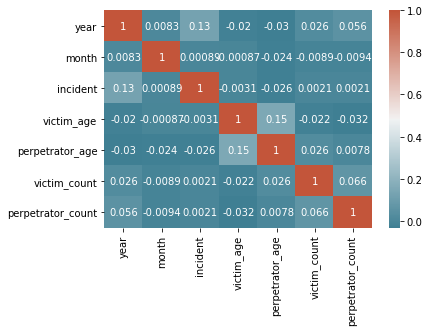

In [5]:
# plot the heatmap
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

#weak positive correlation between perpetrator age and victim age
#maybe perpetrators are more likely to look for victims around their own age?

#weak negative correlation between perpetrator age and perpetrator count
#maybe older perpetrators are less like to have cohorts?

#should visualize these relationships

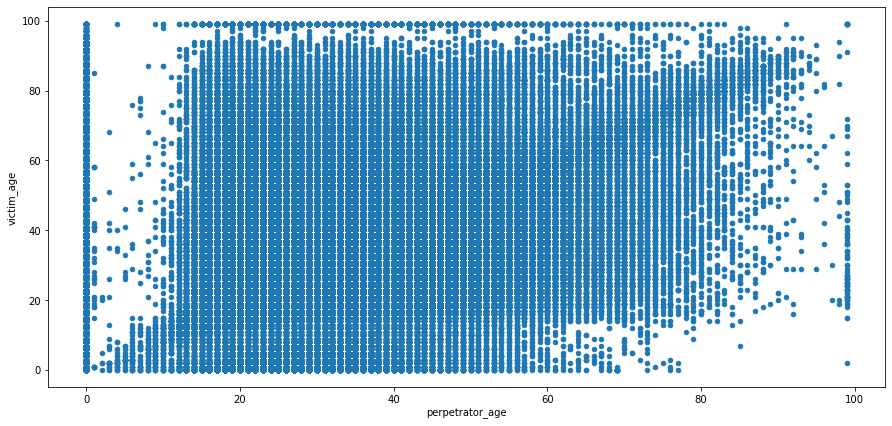

In [6]:
#visualizing relationship between age of victim and perpetrator
df.plot(kind='scatter', x='perpetrator_age', y='victim_age', figsize=(15,7))


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


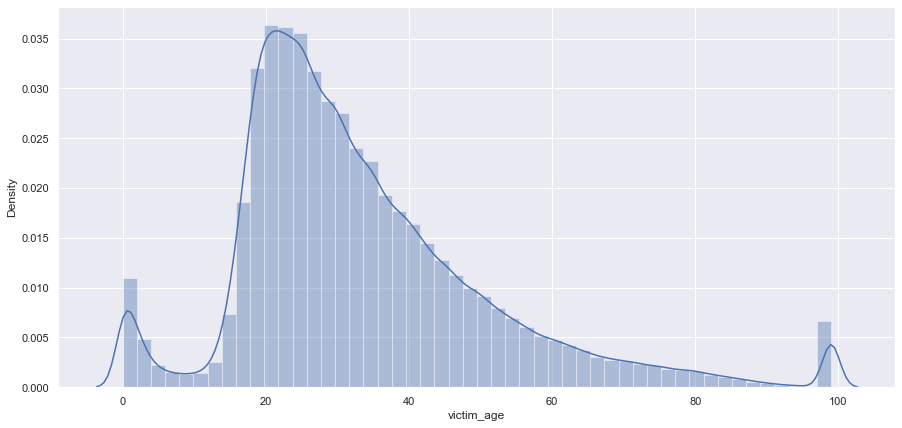

In [7]:
#the correlation between victim and perpetrator age is slightly noticeable on this graph, perhaps there is a slight trend that perpetrators 
#tend to to target victims around their own age range 

#I also want to visualize which age group is most targeted
sns.set(); np.random.seed(0)
vicage = df["victim_age"]
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
vicageplot = sns.distplot(vicage, ax=ax)


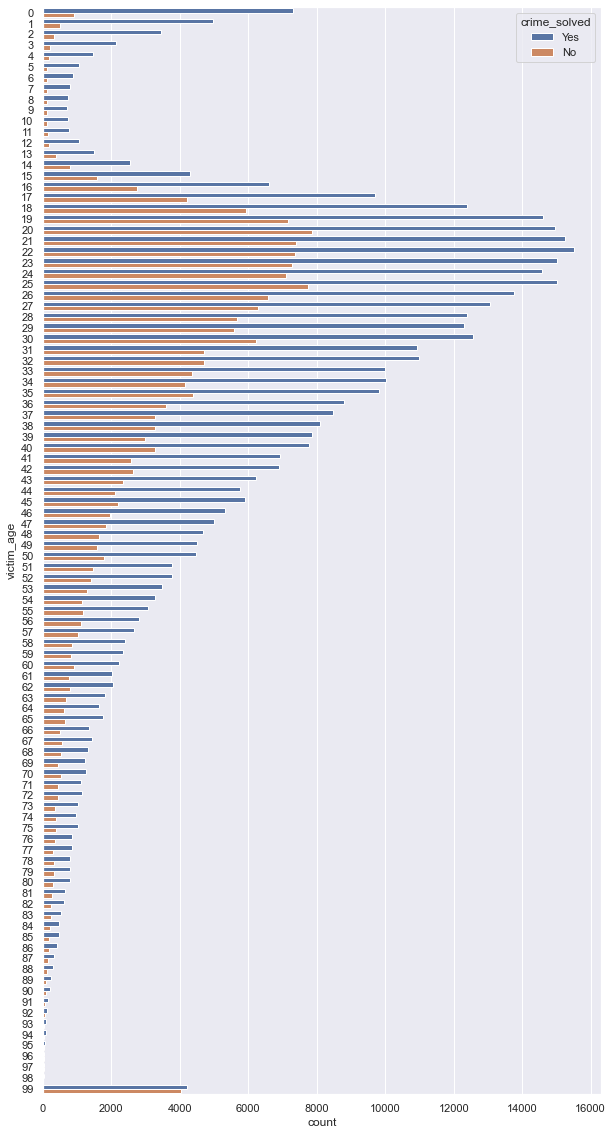

In [8]:
#it seems that there is a high frequency of murders of infants, this frequency decreases throughout childhood years but peaks again around 
#adulthood (early to mid 20s) then the frequence of murders experiences a gradual decrease as age increases towards, there is a slight peek 
#at the elderly age

#solved vs unsolved for victim age
fig_dims = (10, 20)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(data=df, y='victim_age', hue ='crime_solved', ax=ax)
#fix this, this be hideous





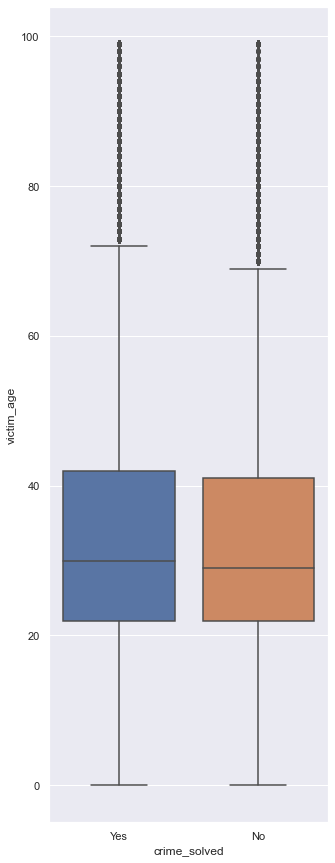

In [9]:
fig_dims = (5, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='crime_solved',y='victim_age',data=df, ax=ax)


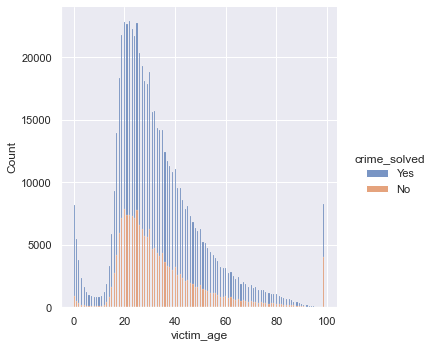

In [18]:
sns.displot(df, x="victim_age", hue="crime_solved",  multiple="stack")

TypeError: No loop matching the specified signature and casting was found for ufunc add

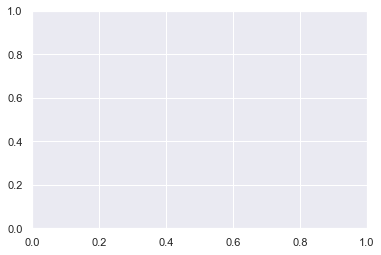

In [19]:
sns.kdeplot(data=df, x="victim_age")

In [ ]:
#Now i want to visualize which age group is most likely to commit murder
perpage = df["perpetrator_age"]
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
perpageplot = sns.distplot(perpage, ax=ax)

In [ ]:
#the peak age of people most likely to commit murder is around 20, this gradually decreases as the age group reaches 40-50 and tapers out at
#60-80

In [ ]:
#examining the negative correlation between perpetrator age and perpetrator count
df.plot(kind='scatter', x='perpetrator_age', y='perpetrator_count', figsize=(15,7))

In [ ]:
#this plot shows that murderes who have partners seem to be younger (mostly around teenage years to around 40)
#this plot also indicate most murders are committed alone or with fewer people

#visualize distribution of perpetrator count
perpcount = df["perpetrator_count"]
fig, ax = plt.subplots(figsize=fig_dims)
perpcountplot = sns.distplot(perpcount, kde=False, bins=30, ax=ax)